In [71]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [72]:
#Import joined house sale data and zip code data, mockup will be from github, final will be from AWS
source = "Resources/combined.csv"
# eventually it will be house sales and zip code data combined.

In [80]:
data = pd.read_csv(source)
data.tail()
data = data.dropna()
data

,Unnamed: 0,Sale Date,Home Type,City,Zip Code,Year Built,Bed,Bath,Sale Price,Property Tax Rate,Square Feet,Lot Size,PO_NAME,STATE,Zip Population,Zip SqMi,Zip Pop Density,Zip Mean HHI
0,0,2021-06-03,Single Family,Gresham,97080,1982,4,3.0,512000,1.12,2724,9583,Gresham,OR,31446,23.246,1352.748860,97765.0
1,1,2021-06-01,Single Family,Gresham,97080,1967,3,2.0,404200,1.12,1150,7000,Gresham,OR,31446,23.246,1352.748860,97765.0
2,2,2021-05-20,Single Family,Gresham,97080,2018,4,2.0,530000,1.12,1947,4791,Gresham,OR,31446,23.246,1352.748860,97765.0
3,3,2021-05-12,Single Family,Gresham,97080,2006,3,3.0,419900,1.12,1548,5009,Gresham,OR,31446,23.246,1352.748860,97765.0
4,4,2021-05-04,Single Family,Gresham,97080,2017,3,3.0,550000,1.12,2209,5227,Gresham,OR,31446,23.246,1352.748860,97765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20643,20643,2020-12-08,Single Family,Beaverton,97005,1952,2,1.0,300000,1.13,743,4356,Beaverton,OR,10772,4.979,2163.486644,73178.0
20644,20644,2020-07-22,Single Family,Beaverton,97005,1962,4,2.0,469000,1.13,1681,6969,Beaverton,OR,10772,4.979,2163.486644,73178.0
20645,20645,2021-01-29,Single Family,Beaverton,97005,1971,3,2.0,305000,1.13,1387,7841,Beaverton,OR,10772,4.979,2163.486644,73178.0
20646,20646,2021-01-04,Single Family,Beaverton,97005,2015,3,3.0,429000,1.13,1463,1306,Beaverton,OR,10772,4.979,2163.486644,73178.0


In [81]:
data.dtypes


Unnamed: 0             int64
Sale Date             object
Home Type             object
City                  object
Zip Code               int64
Year Built             int64
Bed                    int64
Bath                 float64
Sale Price             int64
Property Tax Rate    float64
Square Feet            int64
Lot Size               int64
PO_NAME               object
STATE                 object
Zip Population         int64
Zip SqMi             float64
Zip Pop Density      float64
Zip Mean HHI         float64
dtype: object

# multivariate linear regression1
We need to clean our data before starting the model. NaN values are throwing errors.

In [98]:
X = data[['Zip Mean HHI']]
y = data['Sale Price']


In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [100]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier

LinearRegression()

In [101]:
classifier.fit(X_train, y_train)

LinearRegression()

In [102]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

print(f"Coefficients: { classifier.coef_}")
#X = data[['Square Feet', 'Zip Mean HHI', 'Zip Pop Density','Lot Size','Bed','Bath', 'Year Built']]

Training Data Score: 0.16001594673487618
Testing Data Score: 0.23007554862183233
Coefficients: [5.34403431]


# multivariate linear regression residuals

In [103]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.17564443738544


Residuals are the difference between the true values of y and the predicted values of y.

Source: [Interpreting Residual Plots](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/)

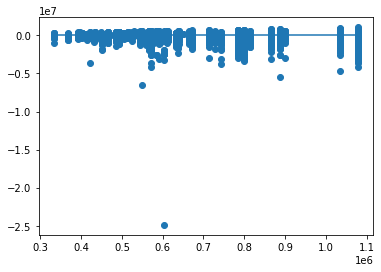

In [104]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [110]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 512000
Predicted output: 549873.7619689903
Prediction Error: 37873.76196899032


In [111]:
x_min = X.min()
x_max = X.max()

In [112]:
y_min_actual = y.min()
y_max_actual = y.max()

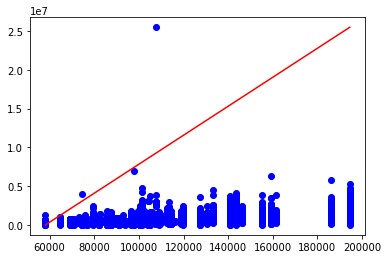

In [113]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min_actual, y_max_actual], c='red')

True output: 512000
Predicted output: 549873.7619689903
Prediction Error: 37873.76196899032


# unsupervised machine learning